# GW150914 FI LnZ

In [2]:
from bilby.gw.result import CBCResult

mcmc_res = CBCResult.from_hdf5("../gwtc-results/gw150914_runs/outdir_bilbymcmc_A/result/mcmc_GW150914_data0_1126259462-391_analysis_H1L1_merge_result.hdf5")
ns_res = CBCResult.from_hdf5("../gwtc-results/gw150914_runs/outdir_dynesty_A/result/dynesty_GW150914_data0_1126259462-391_analysis_H1L1_merge_result.hdf5")
mcmc_res2 = CBCResult.from_hdf5("../gwtc-results/gw150914_runs/outdir_bilbymcmc_B/final_result/mcmc_GW150914_data0_1126259462-391_analysis_H1L1_result.hdf5")
ns_res2 = CBCResult.from_hdf5("../gwtc-results/gw150914_runs/outdir_dynesty_B/final_result/dynesty_GW150914_data0_1126259462-391_analysis_H1L1_result.hdf5")
mcmc_res3 = CBCResult.from_hdf5("../gwtc-results/gw150914_runs/outdir_bilbymcmc_C/result/mcmc_GW150914_data0_1126259462-391_analysis_H1L1_merge_result.hdf5")

In [3]:
print(f"MCMC1: {mcmc_res.log_evidence:.3f} +/- {mcmc_res.log_evidence_err:.3}")
print(f"NS1: {ns_res.log_evidence:.3f} +/- {ns_res.log_evidence_err:.3}")
print(f"MCMC2: {mcmc_res2.log_evidence:.3f} +/- {mcmc_res2.log_evidence_err:.3}")
print(f"NS2: {ns_res2.log_evidence:.3f} +/- {ns_res2.log_evidence_err:.3}")
print(f"MCMC3: {mcmc_res3.log_evidence:.3f} +/- {mcmc_res3.log_evidence_err:.3}")

MCMC1: -6987.655 +/- 0.0748
NS1: -6984.143 +/- 0.159
MCMC2: -6988.215 +/- nan
NS2: -6984.468 +/- 0.108
MCMC3: nan +/- nan


## Investigating results

In [98]:
ns_res.search_parameter_keys

['chirp_mass',
 'mass_ratio',
 'a_1',
 'a_2',
 'tilt_1',
 'tilt_2',
 'phi_12',
 'phi_jl',
 'theta_jn',
 'psi',
 'phase',
 'azimuth',
 'zenith',
 'time_jitter']

In [99]:
ns_res.priors.sample(1)

{'chirp_mass': array([24.40702605]),
 'mass_ratio': array([0.74818186]),
 'a_1': array([0.30080224]),
 'a_2': array([0.7398969]),
 'tilt_1': array([0.33141294]),
 'tilt_2': array([0.15908066]),
 'phi_12': array([1.33725493]),
 'phi_jl': array([1.2414844]),
 'luminosity_distance': array([8674.2387783]),
 'theta_jn': array([1.18037378]),
 'psi': array([0.88342297]),
 'phase': array([5.97838991]),
 'azimuth': array([5.32926742]),
 'zenith': array([1.50626445]),
 'geocent_time': array([1.12625946e+09]),
 'time_jitter': array([9.46507126e-05])}

In [23]:
ns_res.posterior.log_prior

0        -9.231753
1        -9.581511
2        -9.327806
3        -9.025635
4        -9.350724
           ...    
10450   -10.554375
10451   -10.074397
10452   -10.247934
10453   -10.583318
10454    -9.913536
Name: log_prior, Length: 10455, dtype: float64

In [68]:
from bilby.core.prior import PriorDict

s1 = ns_res.posterior.iloc[0].to_dict()
s1_pri = s1['log_prior']
prior_keys = ns_res.priors.keys()
s1 = {k:s1[k] for k in prior_keys}
# WHY ARNT THESE THE SAME??
print(ns_res.priors.ln_prob(s1))
print(s1_pri)

pri = PriorDict({k:v for k,v in ns_res.priors.items() if k in ns_res.search_parameter_keys})
s1 = {k:s1[k] for k in pri.keys()}
print(pri.ln_prob(s1))

-21.64167908557128
-9.231753279263906
-9.231753279263906


## Plots

In [17]:
from funnel.fi_core import get_fi_lnz_list
from funnel.plotting import plot_fi_evidence_results
import matplotlib.pyplot as plt
import numpy as np


keys = [
 'chirp_mass',
 'mass_ratio',
 'a_1',
 'a_2',
 'tilt_1',
 'tilt_2',
 'phi_12',
 'phi_jl',
 'theta_jn',
 'psi',
 'phase',
 'azimuth',
 'zenith',
 'time_jitter', 
 # 'luminosity_distance',
 # 'geocent_time',   
 'log_prior',
 'log_likelihood'
]

keys = ns_res.search_parameter_keys + ['log_prior', 'log_likelihood']

posterior_samples = ns_res.posterior[keys]


fi_results_10k = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 10000), num_ref_params=1, weight_samples_by_lnl=True)
fi_results_5k = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 5000), num_ref_params=1, weight_samples_by_lnl=True )
fi_results_1k = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 1000), num_ref_params=1, weight_samples_by_lnl=True)



|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(10455, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(10455, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(10455, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

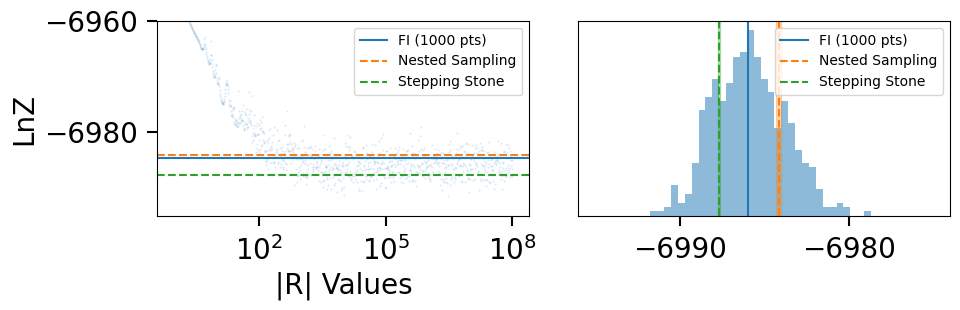

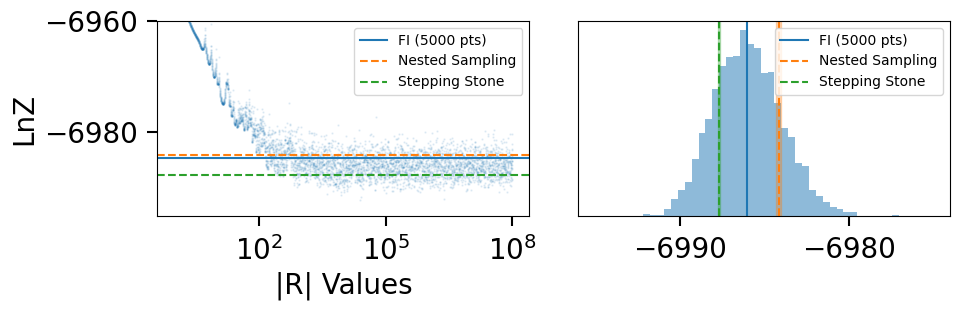

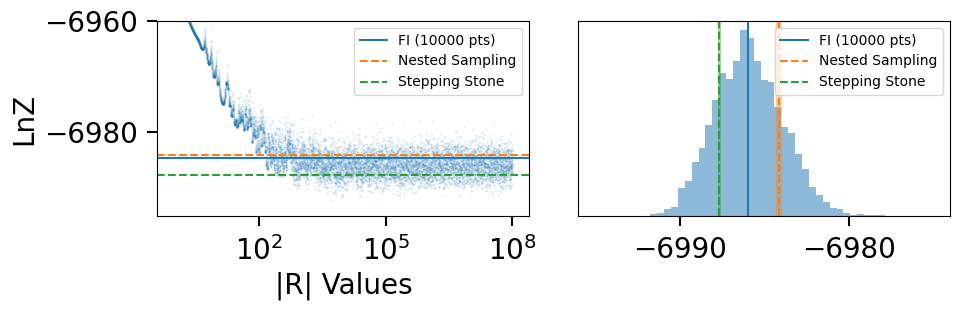

In [36]:
def plot_lnzs(fi_results, ns_res, mcmc_res):

    fig, axes = plt.subplots(1,2, figsize=(10,3.5))
    
    lnzs, r_vals, samp = fi_results

    lnz_noise = ns_res.log_noise_evidence
    fi_lnz = lnzs[0]+lnz_noise
    ns_lnz = ns_res.log_bayes_factor+lnz_noise
    ns_lnz_err = ns_res.log_evidence_err
    ss_lnz = mcmc_res.log_bayes_factor+lnz_noise
    ss_lnz_err = mcmc_res.log_evidence_err
    
    ax= axes[0]
    ax.scatter(r_vals, fi_lnz, s=0.5, alpha=0.1)
    ax.set_xscale('log')
    ax.axhline(np.median(fi_lnz), ls='-', color='C0', label=f'FI ({len(lnzs[0])} pts)')
    ax.axhline(ns_lnz, ls='--', color='C1', label="Nested Sampling")
    ax.axhline(ss_lnz, ls='--', color='C2', label="Stepping Stone")
    ax.legend(fontsize=10)
    ax.set_xlabel("|R| Values")
    ax.set_ylabel("LnZ")
    ax.set_ylim(-6995, -6960)

    ax= axes[1]
    bins = np.linspace(-6995, -6975, 50)
    ax.hist(fi_lnz[r_vals > 10000], density=True, bins=bins, alpha=0.5)
    ax.axvline(np.median(fi_lnz[r_vals > 10000]), ls='-', color='C0', label=f'FI ({len(lnzs[0])} pts)')
    ax.axvline(ns_lnz,ls='--', color='C1', label="Nested Sampling")
    ax.axvspan(ns_lnz-ns_lnz_err, ns_lnz+ns_lnz_err, color="C1", alpha=0.3)
    ax.axvline(ss_lnz, ls='--', color='C2', label="Stepping Stone")
    ax.axvspan(ss_lnz-ss_lnz_err, ss_lnz+ss_lnz_err, color="C2", alpha=0.3)
    ax.legend(fontsize=10)
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()
        
plot_lnzs(fi_results_1k, ns_res, mcmc_res)
plot_lnzs(fi_results_5k, ns_res, mcmc_res)
plot_lnzs(fi_results_10k, ns_res, mcmc_res)

In [19]:
posterior_samples = ns_res2.posterior[keys]
fi_results_10k_v2 = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 10000), num_ref_params=1, weight_samples_by_lnl=True)
fi_results_5k_v2 = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 5000), num_ref_params=1, weight_samples_by_lnl=True )
fi_results_1k_v2 = get_fi_lnz_list(posterior_samples, r_vals=np.geomspace(1e0, 1e8, 1000), num_ref_params=1, weight_samples_by_lnl=True)


|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(12844, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(12844, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

|funnel|INFO| Calculating FI LnZ with 1 reference points and a posterior of size:(12844, 14) 
|funnel|INFO| Posterior columns:
a_1
a_2
azimuth
chirp_mass
log_likelihood
log_prior
mass_ratio
phase
phi_12
phi_jl
psi
theta_jn
tilt_1
tilt_2
time_jitter
zenith 


FI LnZ:   0%|          | 0/1 [00:00<?, ?it/s, FI LnZ: 0]

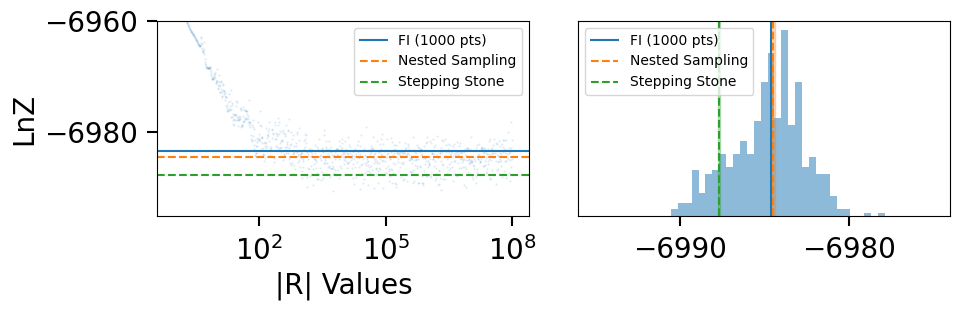

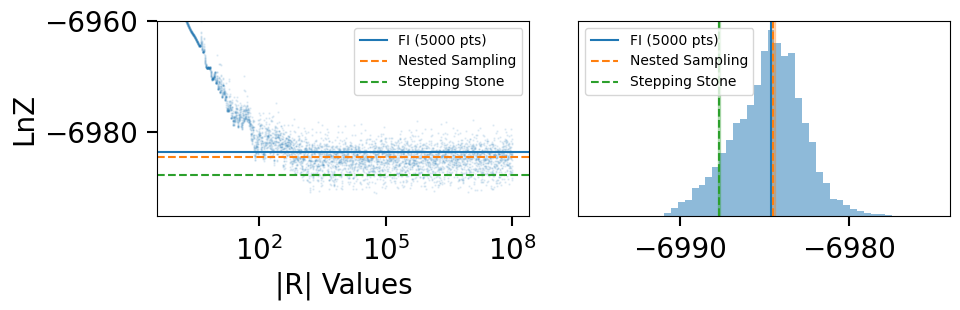

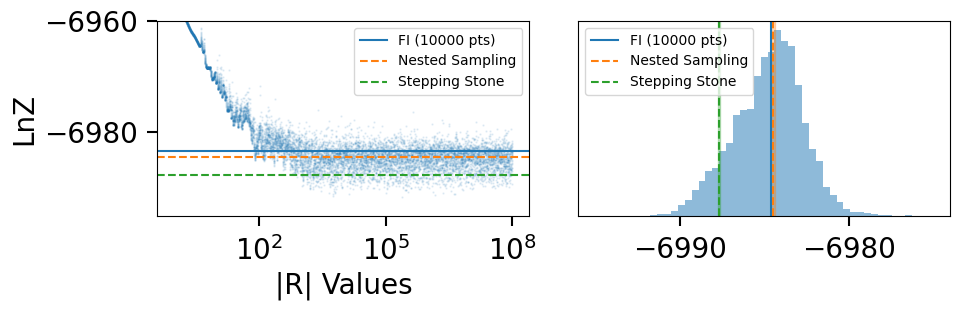

In [37]:
plot_lnzs(fi_results_1k_v2, ns_res2, mcmc_res)
plot_lnzs(fi_results_5k_v2, ns_res2, mcmc_res)
plot_lnzs(fi_results_10k_v2, ns_res2, mcmc_res)

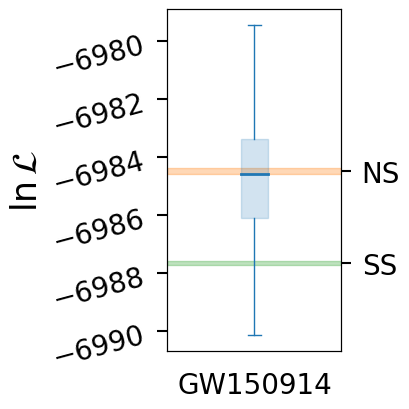

In [79]:
from matplotlib.ticker import MaxNLocator

lnzs, r_vals, samp = fi_results_10k_v2
lnz_noise = ns_res2.log_noise_evidence
fi_lnz = lnzs[0]+lnz_noise
ns_lnz = ns_res2.log_bayes_factor+lnz_noise
ns_lnz_err = ns_res2.log_evidence_err
ss_lnz = mcmc_res.log_bayes_factor+lnz_noise
ss_lnz_err = mcmc_res.log_evidence_err

plt.figure(figsize=(4.5,4.5))
bins = np.linspace(-6995, -6975, 50)

data = fi_lnz[r_vals > 10000]
plt.boxplot(data,showfliers=False, medianprops=dict(linewidth=2, color="C0"),patch_artist=True, boxprops=dict(alpha=0.2, edgecolor='C0'), capprops=dict(color="C0"), whiskerprops=dict(color='C0'))



# ax.hist(fi_lnz[r_vals > 10000], density=True, bins=bins, alpha=0.5)
# plt.axvline(np.median(fi_lnz[r_vals > 10000]), ls='-', color='C0', label=f'FI ({len(lnzs[0])} pts)')
# ax.axvline(ns_lnz,ls='--', color='C1', label="Nested Sampling")
plt.axhspan(ns_lnz-ns_lnz_err, ns_lnz+ns_lnz_err, color="C1", alpha=0.3)
# ax.axvline(ss_lnz, ls='--', color='C2', label="Stepping Stone")
plt.axhspan(ss_lnz-ss_lnz_err, ss_lnz+ss_lnz_err, color="C2", alpha=0.3)
# ax.legend(fontsize=10)
# ax.set_yticks([])
plt.ylabel(r"$\ln \mathcal{L}$", fontsize=25)
plt.yticks(rotation=15) 
plt.xticks([1],["GW150914"])
ax = plt.gca()
# ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ylims = plt.ylim()
ax.xaxis.set_tick_params(width=0)
ax2 = ax.twinx()
ax2.set_yticks([ns_lnz, ss_lnz])
ax2.set_yticklabels(['NS','SS'])
ax2.set_ylim(*ylims)
plt.tight_layout()
plt.show()